In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Simulations du modèle SIR

On rappelle que le modèle SIR s'intéresse aux proportions dans une population des individus sains (ou susceptibles), infectés et rétablis.

Les trois quantités $S(t)$, $I(t)$ et $R(t)$ vérifient le système d'équations différentielles
\begin{equation}\label{eq:syst_SIR}
    \left\lbrace\begin{aligned}
        S'(t) &= - \beta S(t) I(t),\\
        I'(t) &= \beta S(t) I(t) - \gamma I(t),\\
        R'(t) &= \gamma I(t),
    \end{aligned}\right.
\end{equation}
où $\beta$ est le taux de transmission, $\gamma$ est le taux de guérison et $\lambda=1/\gamma$ est la durée moyenne d'infection. 

Nous introduisons également $r_0=\beta\lambda$ le taux de reproduction de base.

Voici un dictionnaire contenant des informations de différentes épidémies qui ont eu lieu dans le passé.

In [3]:
liste_param = [
    {
        'name': 'grippe',
        'S0': 0.95, 'I0': 0.05, 'R0': 0,
        'beta': 0.6, 'lambda': 6
    },
    {
        'name': 'grippe_faible',
        'S0': 0.95, 'I0': 0.05, 'R0': 0,
        'beta': 0.15, 'lambda': 6
    },
    {
        'name': 'rougeole',
        'S0': 0.95, 'I0': 0.05, 'R0': 0,
        'beta': 0.8, 'lambda': 20
    },
    {
        'name': 'Hong-Kong_FLU',
        'S0': 0.95, 'I0': 0.05, 'R0': 0,
        'beta': 0.5, 'lambda': 3
    },
    {
        'name': 'peste',
        'S0': 0.95, 'I0': 0.05, 'R0': 0,
        'beta': 0.0273, 'lambda': 56.2
    },
]

**Question**

> * Proposez une fonction `SIR` qui prend en argument un dictionnaire de paramètres, qui calcule la solution approchée du modèle SIR par la méthode d'Euler explicite (réfléchissez au choix du pas de temps en fonction des valeurs des paramètres) et qui retourne 
>   - `t` un ndarray contenant les instants où la solution est calculée
>   - `S`, `I` et `R` trois ndarray contenant les valeurs approchées de la solution

*Remarque : le calcul de la solution approchée sera arrêtée lorsque le nombre d'infectés sera plus petit qu'un certain seuil ($I_0/1000$ par exemple).*

> * Tracez sur différents graphiques les solutions approchées pour les différents maladies proposées plus haut.
> * Ajoutez des droites horizontales ou verticales correspondant aux valeurs théoriques calculées ($S_\infty$, $1-S_\infty$, $t_0$, $1/r_0$, ...)

*Remarque : pour calculer une approximation de $S_\infty$, vous pouvez utiliser une méthode de Newton intelligement initialisée...*

Vous pouvez essayer d'obtenir des figures comme celle-ci.

![grippe](grippe.png)


Les trois quantités $S(t)$, $I(t)$ et $R(t)$ vérifient le système d'équations différentielles
\begin{equation}\label{eq:syst_SIR}
    \left\lbrace\begin{aligned}
        S'(t) &= - \beta S(t) I(t),\\
        I'(t) &= \beta S(t) I(t) - \gamma I(t),\\
        R'(t) &= \gamma I(t),
    \end{aligned}\right.
\end{equation}
où $\beta$ est le taux de transmission, $\gamma$ est le taux de guérison et $\lambda=1/\gamma$ est la durée moyenne d'infection. 

In [275]:
def SIR(dic):
    
    
    
    beta = dic["beta"]
    lam = dic["lambda"]
    gamma = 1./lam
    
    '''print(beta)
    print(lam)
    print(gamma)'''
    
    res_I = []
    res_S = []
    res_R = []
    res_t = []
    
    i = dic["I0"]
    I0= dic["I0"]
    s = dic["S0"]
    r = dic["R0"]
    
    if r != 0 or i +s != 1 :
        print("erreur dans les conditions initiales")
    
    '''print("i ",i)
    print("s ",s)
    print("r ",r)'''
    
    compteur = 0
    
    res_S.append(s)
    res_I.append(i)
    res_R.append(r)
    res_t.append(0)
    

    dt = 0.1*min(1/beta,lam)
    a = 0
    while i>1.e-10:
        a+= dt
        s_prec = s
        i_prec = i
        r_prec = r

        s += dt*(-beta * s_prec*i_prec)
        i += dt*(beta * s_prec * i_prec - (1/lam)*i_prec)
        r += dt*((1/lam) * i_prec)
        
        res_S.append(s)
        res_I.append(i)
        res_R.append(r)
        res_t.append(a)
    ro = beta * lam
    pic_I = 1-(1- np.log(1/(ro*dic["S0"])))/ro
    pic_S = 1/ro
    pic_T = t0
    
    
    return  res_t,res_S, res_I, res_R,pic_I,pic_S,pic_T

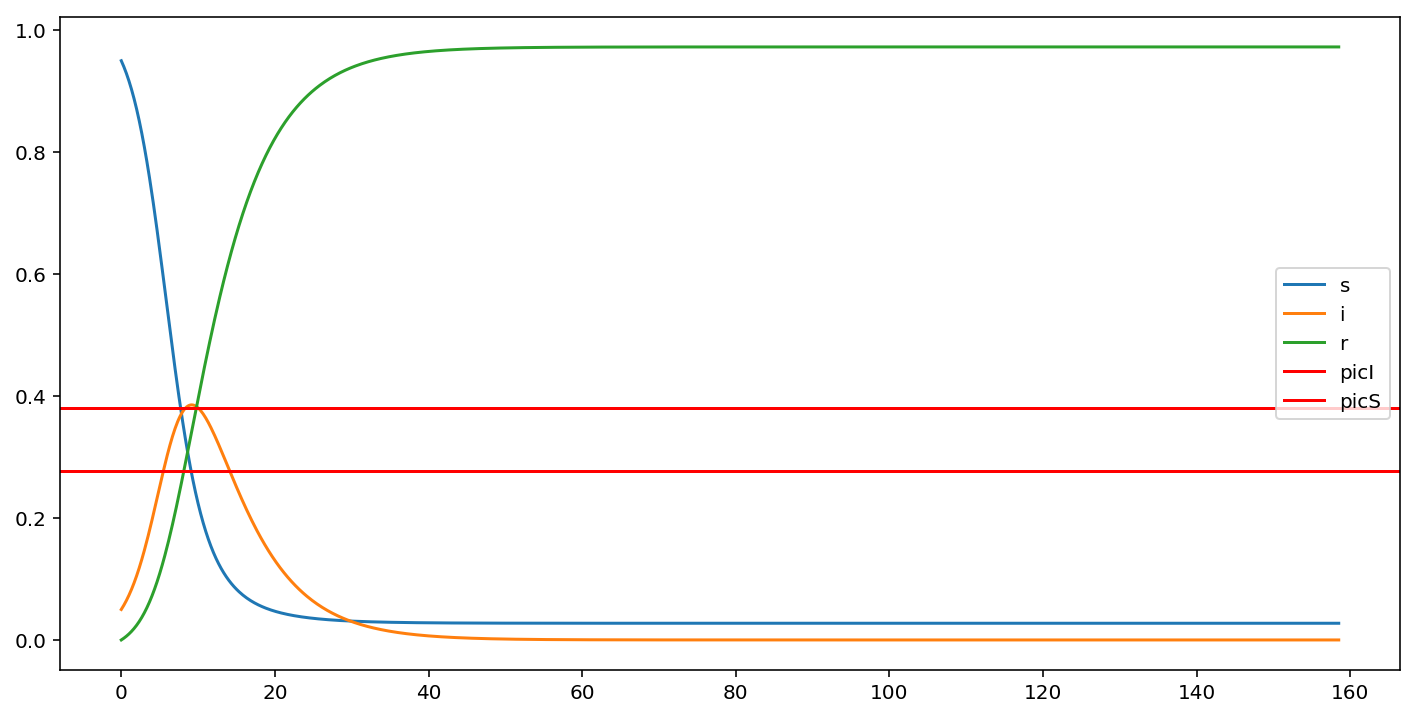

In [277]:
t,s,i,r,pic_I,pic_S,pic_T= SIR( liste_param[0])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(t, s,label="s")
ax.plot(t, i,label="i")
ax.plot(t, r,label="r")
#ax.plot(t,np.array(t)*0 +1,label="S infini")
#ax.axhline(y=0.5, color='r', linestyle='-')
ax.axhline(y=pic_I, color='r', label="picI")
ax.axhline(y=pic_S, color='r', label="picS")


ax.legend()


In [223]:
def affiche(dic):
    t,s,i,r = SIR(70,  dic)

    fig,ax = plt.subplots(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(t, s,label="s")
    ax.plot(t, i,label="i")
    ax.plot(t, r,label="r")
    ax.set_title(dic['name'])
    #ax.plot(t,np.array(t)*0 +1,label="S infini")
    #ax.axhline(y=0.5, color='r', linestyle='-')

    ax.legend()

0.15
6
0.16666666666666666
erreur dans les conditions initiales
i  0.05
s  0.95
r  0


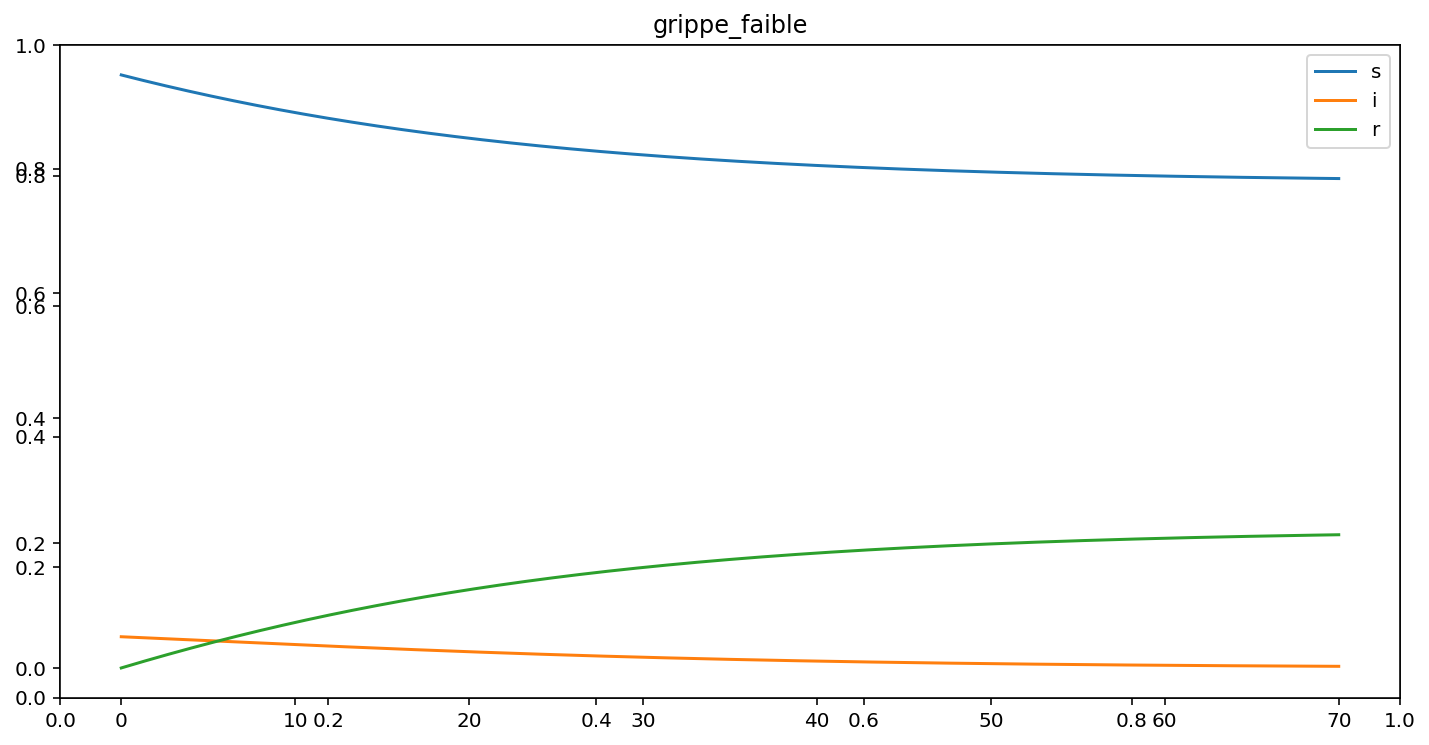

In [225]:
affiche(liste_param[1])

0.6
6
0.16666666666666666
i  0.05
s  0.95
r  0


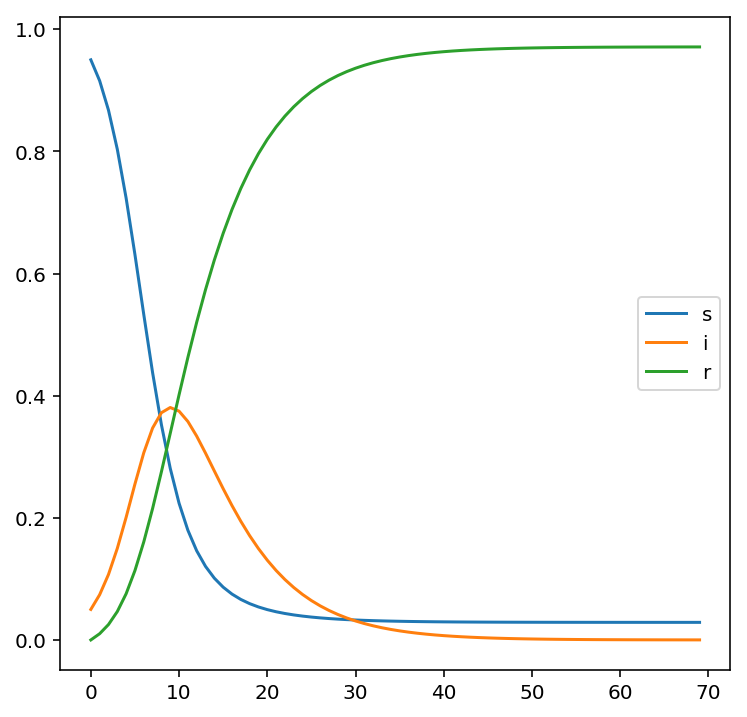

In [4]:
def SIR(t, dic):
    
    beta = dic["beta"]
    lam = dic["lambda"]
    gamma = 1./lam
    
    print(beta)
    print(lam)
    print(gamma)
    
    res_I = []
    res_S = []
    res_R = []
    
    i = dic["I0"]
    I0= dic["I0"]
    s = dic["S0"]
    r = dic["R0"]
    
    print("i ",i)
    print("s ",s)
    print("r ",r)
    
    compteur = 0
    
    res_S.append(s)
    res_I.append(i)
    res_R.append(r)
    
    compteur = 0
    for Tf in t:
        dt = 0.0001
        for _ in np.arange(compteur,Tf, dt):
            if(I0/1000<i):
                s_prec = s
                i_prec = i
                r_prec = r

                s += dt*(-beta * s_prec*i_prec)
                i += dt*(beta * s_prec * i_prec - (1/lam)*i_prec)
                r += dt*((1/lam) * i_prec)
        compteur = Tf
        res_S.append(s)
        res_I.append(i)
        res_R.append(r)
    
    
    return  res_S, res_I, res_R

t = np.arange(1,70)
s,i,r = SIR(t,  liste_param[0])
t = np.arange(0,70)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(t, s,label="s")
ax.plot(t, i,label="i")
ax.plot(t, r,label="r")
ax.legend()

In [ ]:
def SIR(Tf, dic):
    
    
    
    beta = dic["beta"]
    lam = dic["lambda"]
    gamma = 1./lam
    
    '''print(beta)
    print(lam)
    print(gamma)'''
    
    res_I = []
    res_S = []
    res_R = []
    res_t = []
    
    i = dic["I0"]
    I0= dic["I0"]
    s = dic["S0"]
    r = dic["R0"]
    
    if r != 0 or i +s != 1 :
        print("erreur dans les conditions initiales")
    
    '''print("i ",i)
    print("s ",s)
    print("r ",r)'''
    
    compteur = 0
    
    res_S.append(s)
    res_I.append(i)
    res_R.append(r)
    res_t.append(0)
    

    dt = 3*min(1/beta,lam)
    for a in np.arange(0,Tf, dt):
        #if(I0/1000<i):
        if(1.e-10<i):
            s_prec = s
            i_prec = i
            r_prec = r

            s += dt*(-beta * s_prec*i_prec)
            i += dt*(beta * s_prec * i_prec - (1/lam)*i_prec)
            r += dt*((1/lam) * i_prec)
        compteur = Tf
        res_S.append(s)
        res_I.append(i)
        res_R.append(r)
        res_t.append(a)
    
    
    return  res_t,res_S, res_I, res_R